In [14]:
import opendatasets as od
import pandas as pd
import cv2
import glob
import numpy as np
from skimage.io import imshow
import matplotlib.pyplot as plt
from skimage import exposure
from scipy import ndimage
import seaborn as sns
from skimage import data, io, filters, feature

In [15]:
od.download("https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-images")

Skipping, found downloaded files in "./ship-and-iceberg-images" (use force=True to force download)


In [16]:
import os
for dirname, _, filenames in os.walk('/home/apprenant/PycharmProjects/ClimateProject---E3/ship-and-iceberg-images/input_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Load the data

In [17]:
npz = np.load('/home/apprenant/PycharmProjects/ClimateProject---E3/Data analysis/ship-and-iceberg-images/input_data.npz')

X_train = npz['X_train']
Y_train = npz['Y_train']
del npz

print('We have {} examples to work with'.format(Y_train.shape[0]))


We have 4113 examples to work with


In [18]:
print('shape of picture: {}'.format(X_train.shape))
print('shape of picture: {}'.format(Y_train.shape))

shape of picture: (4113, 75, 75, 3)
shape of picture: (4113,)


# Prepare data & analyse

## Ship analysis

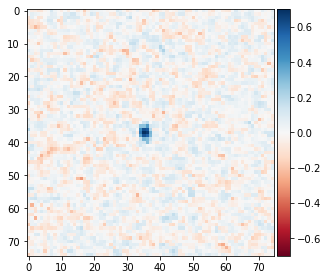

This is: Ship


In [31]:
ix = 9
imshow(np.squeeze(X_train[ix,:,:,2]))#Looking at the combined channel
plt.show()
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(Y_train[ix])])

In [21]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline



In [32]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_train[9,:,:,2], 'Here is a ship')

In [26]:
print ('This is:',int(Y_train[ix]))

This is: 0


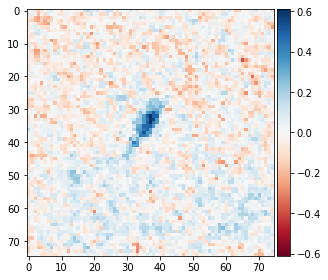

This is: Iceberg


In [33]:
ix = 6
imshow(np.squeeze(X_train[ix,:,:,2]))#Looking at the combined channel
plt.show()
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(Y_train[ix])])

In [34]:
#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_train[6,:,:,2], 'Here is an iceberg')

In [7]:
Y_train.sum()

2112

In [8]:
Y_train.shape

(4113,)

In [9]:
def imageHistG(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])

In [10]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Color image
        axis[0].imshow(image, cmap='jet')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

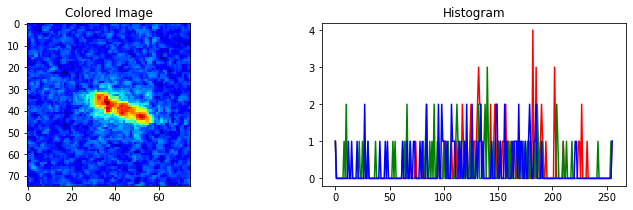

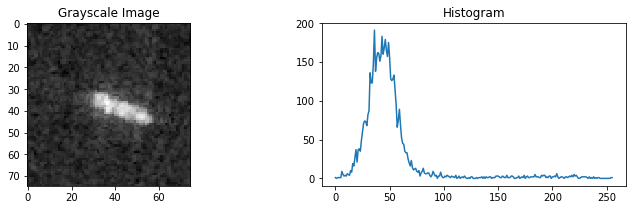

In [11]:
ix = 100
imageHist(X_train[ix,:,:,2])
imageHistG(X_train[ix,:,:,2])

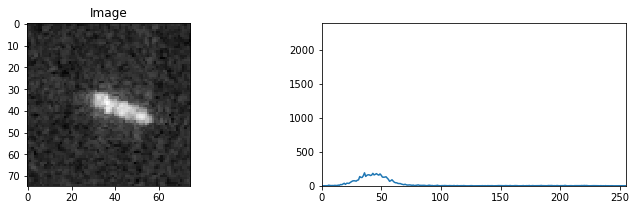

In [12]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(X_train[ix,:,:,2])

## Iceberg analysis

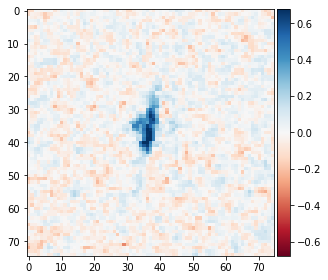

This is: Ship


In [13]:
ix1 = 110 #0-4112
imshow(np.squeeze(X_train[ix1,:,:,2]))#Looking at the combined channel
plt.show()
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(Y_train[ix])])

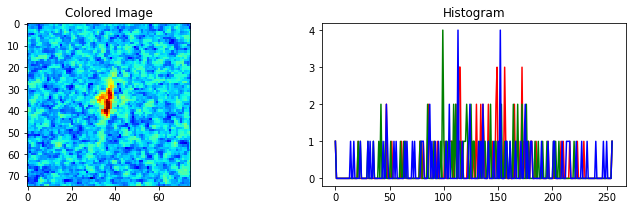

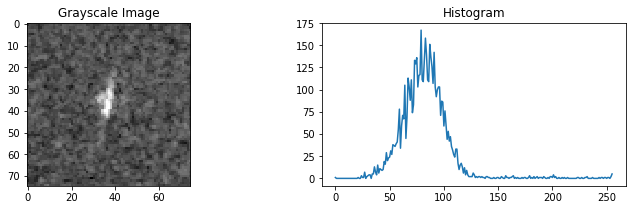

In [14]:
ix = 110
imageHist(X_train[ix,:,:,2])
imageHistG(X_train[ix,:,:,2])

# ANALYSE RGB LAYER

In [15]:
def RGBStats(image): 
    colors = [] 
    for i in range(0, 3): 
        max_color =np.max(image[:,:,i]) 
        min_color =np.min(image[:,:,i]) 
        mean_color = np.mean(image[:,:,i]) 
        median_color = np.median(image[:,:,i]) 
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,  
                        index = ['Red', ' Green', 'Blue'], 
                        columns = ['Min', 'Max', 'Mean', 'Median'])
 
RGBStats(X_train)

,Min,Max,Mean,Median
Red,-0.613423,0.718828,-0.013360,-0.012173
Green,-0.643982,0.724928,-0.013464,-0.012064
Blue,-0.615498,0.724928,-0.013331,-0.011992


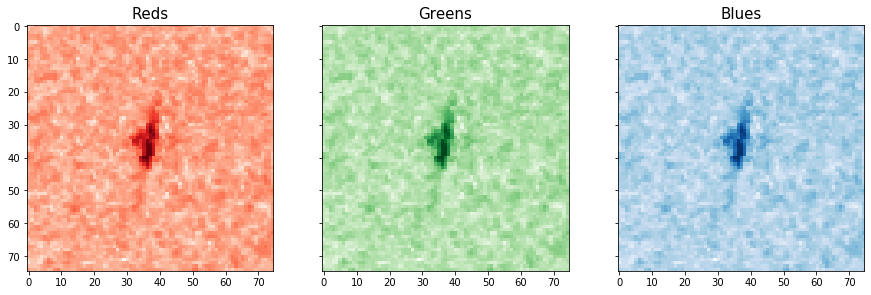

In [16]:
rgb = ['Reds','Greens','Blues'] 
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True) 
for i in range(3): 
   axes[i].imshow(X_train[ix,:,:,2], cmap = rgb[i]) 
   axes[i].set_title(rgb[i], fontsize = 15)

# DETECT

On peut ici observer que les icebergs sont en plusieurs parties. Cela peut aider pour la detection. On peut donc lors de la détection poser des limites de périmètres pour aider à réaliser la bonne détection

/home/apprenant/.local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


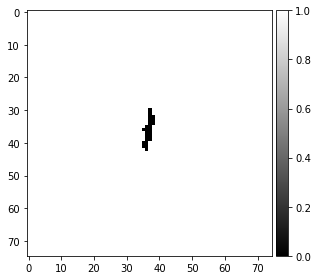

In [17]:
im = np.where(X_train[ix,:,:,2]>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'));

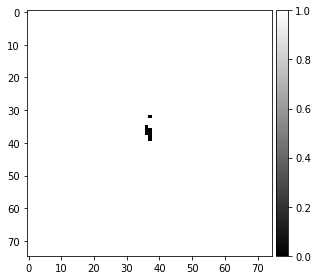

In [18]:
im = np.where(X_train[ix1,:,:,1]>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'));

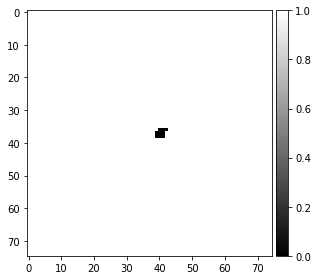

In [19]:
ix = 153 #0-4112data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAT4AAAEYCAYAAADFzZobAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAVp0lEQVR4nO3df4xd513n8fcnTqv+JjYeW6M4g9NdkxKhxkln3VRhIU1ocbKozkqb3aRAvZHRbKQEpRISdXclEOKfIAQqiNBo1IYYUZo1bYpN5G2wBrLdBVpst24ax3Vj3OAMNnYmUMq2guDks3/cM83Nzczce2fO3Otzn89Lurr3Offc5/lOZvzJc37cc2SbiIiSXDLsAiIiBi3BFxHFSfBFRHESfBFRnARfRBQnwRcRxUnwRcRFS9JDks5LemqR9yXptySdlPSkpOt66TfBFxEXs4eB7Uu8fwuwpXpMAR/vpdMVBZ+k7ZJOVGm7eyV9RUR0sv0F4O+XWGUH8Htu+SJwmaTxbv1eutyCJK0BHgDeB8wChyTtt/30Yp9Zv369N2/evNwhI+Ii8+yzzzI3N6f59vbt2z03N9fz548cOXIM+Oe2RdO2p/so4XLgubb2bLXs7FIfWnbwAduAk7ZPAUh6hFb6Lhp8mzdv5vDhwysYMiIuJpOTk69qz83N9fVvXNI/257svubiXSywrOv3cFeyqbtY0r6KpClJhyUdfv7551cwXEQ0ge2eHzWYBa5oa28CznT70EqCr6ektT1te9L25NjY2AqGi4gmGHDw7Qc+VB3dvR74R9tLbubCyjZ1l5W0ETHa6rzik6RPAzcC6yXNAr8EvK4a50HgAHArcBL4LnBXL/2uJPgOAVskXQn8LXAH8MEV9BcRDVfjTG6+vzu7vG/gnn77XXbw2b4g6V7gcWAN8JDtY8vtLyJGQxOu8bmSGR+2D9CaakZEAAUEX0REpwRfRBQnwRcRRbHNyy+/POwyukrwRUStMuOLiOIk+CKiOAm+iChK3Scwr5YEX0TUKsEXEcVJ8EVEcRJ8EVGU7OOLiCIl+CKiOAm+iChOgi8iipPgi4ii5OBGRBQpwRcRxUnwRURxEnwRUZwEX0QUJQc3IqJICb6IKE6CLyKK04Tgu6TbCpIeknRe0lNty9ZJOijpmep57eqWGRFNMb+fr5fHsHQNPuBhYHvHst3AjO0twEzVjojCzd9estfHsHQNPttfAP6+Y/EOYE/1eg9wW811RURDNWHGt9x9fBttnwWwfVbShsVWlDQFTAFMTEwsc7iIaIqR2Me3UranbU/anhwbG1vt4SJiyEZ5xndO0ng12xsHztdZVEQ007ADrVfLnfHtB3ZWr3cC++opJyKabiRmfJI+DdwIrJc0C/wScD+wV9Iu4DRw+2oWGRHN0YQZX9fgs33nIm/dXHMtETECRiL4IiL6keCLiKIMe99drxJ8EVGrBF9EFCfBFxHFaULwrfo3NyKiLHWfxydpu6QTkk5Kes0FUSR9n6Q/lvRVScck3dWtzwRfRNSmn9DrJfgkrQEeAG4BrgbulHR1x2r3AE/bvobWOce/Lun1S/Wb4IuIWtU849sGnLR9yvaLwCO0rg71qiGBt0oS8BZaV5O6sFSn2ccXEbXqcx/fekmH29rTtqfb2pcDz7W1Z4F3d/Tx27S+RnsGeCvwX2wvebG/BF9E1KrP4JuzPbnE+1poiI72TwBHgZuAfwMclPR/bH97sU6zqRsRtap5U3cWuKKtvYnWzK7dXcCjbjkJfBN4x1KdJvgiojZ1H9wADgFbJF1ZHbC4g9ZmbbvTVNcOkLQRuAo4tVSn2dSNiFrVeR6f7QuS7gUeB9YAD9k+Junu6v0HgV8BHpb0NVqbxh+xPbdUvwm+iKhV3Scw2z4AHOhY9mDb6zPA+/vpM8EXEbVqwjc3EnwRURtXt5e82CX4IqJWmfFFRHESfBFRnARfRBQnwRcRRcml5yOiSAm+iChOE4Kv63d1JV0h6c8kHa+ubnpftXydpIOSnqme165+uRFxsav7CsyroZeLFFwAft72DwHXA/dUV0DdDczY3gLMVO2IKNxIBJ/ts7a/XL3+J+A4rYsD7gD2VKvtAW5brSIjohlW4eosq6KvfXySNgPXAl8CNto+C61wlLRhkc9MAVMAExMTK6k1IhpgJPbxzZP0FuCzwIeXurJpJ9vTtidtT46NjS2nxohokJGZ8Ul6Ha3Q+5TtR6vF5ySNV7O9ceD8ahUZEc0xEjO+6s5FnwSO2/6Ntrf2Azur1zuBffWXFxFNMyozvhuAnwG+Julotey/A/cDeyXtonXp59tXp8SIaIphB1qvugaf7f/Lwnc6guo69xER80Yi+CIi+pHgi4jiJPgiojgJvogoysgc3IiI6EeCLyKKk+CLiOIk+CKiKLmvbkQUKTO+iChOgi8iipPgi4jiJPgioig5gTkiipTgi4jiJPgiojgJvogoToIvIoqSgxsRUaQEX0QUJ8EXEcVJ8EVEUZqyj6/rDcUjIvpR9w3FJW2XdELSSUm7F1nnRklHJR2T9L+79ZkZX0TUqs4Zn6Q1wAPA+4BZ4JCk/bafblvnMuB3gO22T0va0K3frjM+SW+Q9FeSvlql6S9Xy9dJOijpmep57XJ/uIgYHTXP+LYBJ22fsv0i8Aiwo2OdDwKP2j5djX++W6e9bOr+C3CT7WuArcB2SdcDu4EZ21uAmaodEYWrOfguB55ra89Wy9r9ILBW0hOSjkj6ULdOu27qulXd/6uar6seppW6N1bL9wBPAB/p1l9EjK5lHNxYL+lwW3va9nRbWwsN09G+FHgXcDPwRuAvJX3R9jcWG7SnfXzVdvYR4N8CD9j+kqSNts8C2D672Ha1pClgCmBiYqKX4SKiwfoMvjnbk0u8Pwtc0dbeBJxZYJ05298BviPpC8A1wKLB19NRXdsv2d5aDbpN0g/38rnqs9O2J21Pjo2N9fqxiGiomjd1DwFbJF0p6fXAHcD+jnX2Af9e0qWS3gS8Gzi+VKd9HdW1/S1JTwDbgXOSxqvZ3jjQdYdiRIy+Oo/q2r4g6V7gcWAN8JDtY5Lurt5/0PZxSZ8HngReBj5h+6ml+u0afJLGgH+tQu+NwI8Dv0ordXcC91fP+5b/40XEKFiN20vaPgAc6Fj2YEf714Bf67XPXmZ848Ceaj/fJcBe249J+ktgr6RdwGng9l4HjYjR1YRvbvRyVPdJ4NoFlr9A6yhKRMT3jETwRUT0I8EXEcVJ8EVEUZpydZYEX0TUKsEXEcVJ8EVEcRJ8EVGcBF9EFCUHNyKiSAm+iChOgi8iipPgi4jiJPgiFiEtdEXx12rCP6J4RQ5uRESREnwRUZwEX0SbbN6WoQm/vwRfRNQqwRcRRcnBjYgoUoIvIoqT4IuI4tR9e8nVkOCLiNpkH19Ehyb8g4iVa8LvOcEXEbVqQvBd0uuKktZI+oqkx6r2OkkHJT1TPa9dvTIjoinmN3d7eQxLz8EH3Accb2vvBmZsbwFmqnZEFG5kgk/SJuA/AJ9oW7wD2FO93gPcVm9pEdE0/YTeRR98wMeAXwDaj1NvtH0WoHresNAHJU1JOizp8PPPP7+iYiPi4jcSwSfpJ4Hzto8sZwDb07YnbU+OjY0tp4uIaJAmBF8vR3VvAD4g6VbgDcDbJP0+cE7SuO2zksaB86tZaEQ0w0gc1bX9UdubbG8G7gD+1PZPA/uBndVqO4F9q1ZlRDTGqMz4FnM/sFfSLuA0cHs9JUVEUw070HrVV/DZfgJ4onr9AnBz/SVFRJONXPBFRHST4IuI4iT4IqI4Cb6IKMpIHtyIiOimCcHXz0UKIiK6qvs8PknbJZ2QdFLSohdDkfTvJL0k6T916zMzvoioVZ0zPklrgAeA9wGzwCFJ+20/vcB6vwo83ku/mfFFRK1qnvFtA07aPmX7ReARWleG6vRzwGfp8auzCb6IqM0qXJbqcuC5tvZstex7JF0O/EfgwV7rzKZuRNSqz03d9ZIOt7WnbU+3tbXQEB3tjwEfsf2StNDqr5Xgi4ha9Xl7yTnbk0u8Pwtc0dbeBJzpWGcSeKQKvfXArZIu2P6jxTpN8EVErWo+neUQsEXSlcDf0rpC1Ac7xrty/rWkh4HHlgo9SPBFRI3qPoHZ9gVJ99I6WrsGeMj2MUl3V+/3vF+vXYIvImpV9wnMtg8ABzqWLRh4tv9rL30m+CKiVk345kaCLyJqleCLiOIk+CKiKLk6S0QUKcEXEcVJ8EVEcRJ8EVGcBF9EFGWkDm5Iehb4J+Al4ILtSUnrgP8JbAaeBf6z7X9YnTIjoimaEHz9XI/vvba3tl1JYTcwY3sLMFO1I6JwdV96fjWs5EKkO4A91es9wG0rLycimm6Ugs/An0g6ImmqWrbR9lmA6nnDahQYEc3ShODr9eDGDbbPSNoAHJT09V4HqIJyCmBiYmIZJUZEUww70HrV04zP9pnq+TzwOVo3ADknaRygel7wJh+2p21P2p4cGxurp+qIuGg1YcbXNfgkvVnSW+dfA+8HngL2Azur1XYC+1aryIhojiYEXy+buhuBz1XXs78U+APbn5d0CNgraRdwGrh99cqMiKZowqZu1+CzfQq4ZoHlLwA3r0ZREdFMw57J9Srf3IiIWiX4IqI4fd5ecigSfBFRq8z4IqIo2ccXEUVK8EVEcRJ8EVGcBF9EFCfBFxFFycGNiChSgi8iipPgi4jiJPgiojgJvogoSg5uRESREnwRUZwEX0QUJ8EXEcVJ8EVEUXJwIyKKlOCLiOIk+CKiOAm+iChOE4LvkmEXEBGjY/7gRq+PXkjaLumEpJOSdi/w/k9JerJ6/IWk19wHvFNPwSfpMkmfkfR1ScclvUfSOkkHJT1TPa/t6aeIiJH28ssv9/zoRtIa4AHgFuBq4E5JV3es9k3gx2y/E/gVYLpbv73O+H4T+LztdwDXAMeB3cCM7S3ATNWOiMLVPOPbBpy0fcr2i8AjwI6O8f7C9j9UzS8Cm7p12jX4JL0N+FHgk9UgL9r+VjX4nmq1PcBtvfwUETHa+gy+9ZIOtz2mOrq7HHiurT1bLVvMLuB/dauxl4MbbweeB3632nY+AtwHbLR9tvpBz0rasNCHqx9kCmBiYqKH4SKiqZZxAvOc7ckl3tdCwyy4ovReWsH3I90G7WVT91LgOuDjtq8FvkMfm7W2p21P2p4cGxvr9WMR0VA1b+rOAle0tTcBZzpXkvRO4BPADtsvdOu0l+CbBWZtf6lqf4ZWEJ6TNF4NOg6c76GviBhxNQffIWCLpCslvR64A9jfvoKkCeBR4Gdsf6OXTrsGn+2/A56TdFW16Gbg6WrwndWyncC+XgaMiNFWZ/DZvgDcCzxO66DqXtvHJN0t6e5qtV8Evh/4HUlHJR3u1m+vJzD/HPCpKnFPAXfRCs29knYBp4Hbe+wrIkZY3Scw2z4AHOhY9mDb658FfrafPnsKPttHgYV2QN7cz2ARMdpydZaIKFKCLyKKk+CLiOIk+CKiOAm+iChKDm5ERJESfBFRnARfRBQnwRcRxUnwRURRcnAjIoqU4IuI4iT4IqI4Cb6IKE6CLyKKYrun20YOW4IvImqVGV9EFCfBFxHFSfBFRFFyAnNEFCnBFxHFSfBFRHESfBFRnARfRBSlKQc3Lum2gqSrJB1te3xb0oclrZN0UNIz1fPaQRQcERe3+fDr5TEsXYPP9gnbW21vBd4FfBf4HLAbmLG9BZip2hFRuJEIvg43A39t+2+AHcCeavke4LY6C4uIZmpC8PW7j+8O4NPV6422zwLYPitpw0IfkDQFTAFMTEwst86IaIiR2Mc3T9LrgQ8Af9jPALanbU/anhwbG+u3vohokH5me02Z8d0CfNn2uap9TtJ4NdsbB87XX15ENM1IzfiAO3llMxdgP7Czer0T2FdXURHRXCMz45P0JuB9wH9rW3w/sFfSLuA0cHv95UVE0zRhxtdT8Nn+LvD9HcteoHWUNyLie0Ym+CIiejHsTdheJfgiolYJvogoToIvIoqT4IuI4iT4IqIoTbmvbr8XKYiIWFLdJzBL2i7phKSTkl5zFSi1/Fb1/pOSruvWZ4IvImpVZ/BJWgM8QOsrs1cDd0q6umO1W4At1WMK+Hi3fhN8EVGrmmd824CTtk/ZfhF4hNYl8drtAH7PLV8ELquuH7Coge7jO3LkyJykvwHWA3ODHLvDsMdPDRfH+Klh5TX8QEf78aqvXr1B0uG29rTt6bb25cBzbe1Z4N0dfSy0zuXA2cUGHWjw2R4DkHTY9uQgx2437PFTw8Uxfmqovwbb2+uop40WGmYZ67xKNnUj4mI2C1zR1t4EnFnGOq+S4IuIi9khYIukK6uLId9B65J47fYDH6qO7l4P/OP81eEXM6zz+Ka7rzLS40NquBjGh9Qw72Ko4TVsX5B0L619h2uAh2wfk3R39f6DwAHgVuAkrZuh3dWtXzXhLOuIiDplUzciipPgi4jiDDT4un31ZJXGfEjSeUlPtS1bJ+mgpGeq57WrOP4Vkv5M0nFJxyTdN4Qa3iDpryR9tarhlwddQ1stayR9RdJjw6hB0rOSvibp6Pz5YwP+XVwm6TOSvl79TbxnwONfVf3s849vS/rwMP4WhmlgwdfjV09Ww8NA57lFu4EZ21uAmaq9Wi4AP2/7h4DrgXuqn3uQNfwLcJPta4CtwPbq6Ncga5h3H3C8rT2MGt5re2vbeWuDrOE3gc/bfgdwDa3/FgMb3/aJ6mffCryL1sGAzw2yhotCv/fBXO4DeA/weFv7o8BHBzT2ZuCptvYJYLx6PQ6cGOB/h320btw0lBqANwFfpnX2+0BroHV+1QxwE/DYMH4XwLPA+o5lA6kBeBvwTaqDioMef4F63g/8+TBrGNZjkJu6i32tZBg2ujrPp3reMIhBJW0GrgW+NOgaqk3Mo7Tuf3zQ9sBrAD4G/ALQft2iQddg4E8kHZE0NeAa3g48D/xutbn/CUlvHuD4ne7glVvGDquGoRhk8PX9tZJRIuktwGeBD9v+9qDHt/2SW5s3m4Btkn54kONL+kngvO0jgxx3ATfYvo7WLpd7JP3oAMe+FLgO+Ljta4HvMKRNyupk4A8AfziM8YdtkMHX99dKVtG5+as3VM/nV3MwSa+jFXqfsv3oMGqYZ/tbwBO09nsOsoYbgA9IepbWFTZukvT7A64B22eq5/O09m1tG2ANs8BsNdsG+AytIBzG38ItwJdtn6vaQ/l7HJZBBl8vXz0ZlP3Azur1Tlr73VaFJAGfBI7b/o0h1TAm6bLq9RuBHwe+PsgabH/U9ibbm2n97v/U9k8PsgZJb5b01vnXtPZxPTWoGmz/HfCcpKuqRTcDTw9q/A538spmLkOqYXgGuUOR1tdKvgH8NfA/BjTmp2ldnuZfaf0fdxetm6PPAM9Uz+tWcfwfobVJ/yRwtHrcOuAa3gl8parhKeAXq+UDq6Gjnht55eDGIP87vB34avU4Nv83OOAatgKHq9/FHwFrB/17oHWA6wXg+9qWDeVvYViPfGUtIoqTb25ERHESfBFRnARfRBQnwRcRxUnwRURxEnwRUZwEX0QU5/8DqXWDRRN0Os4AAAAASUVORK5CYII=
test2 = X_train[ix,:,:,2]
im = np.where(test2>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'));

# REGARDER PLUS EN DÉTAILS CERTAINES CARACTÉRISTIQUES

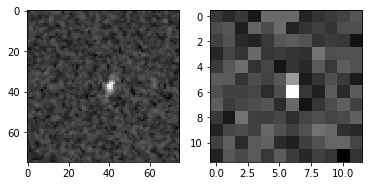

In [20]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

image_rescaled = transform.rescale(image=test2, scale=1.0 / 6.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(test2, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'));

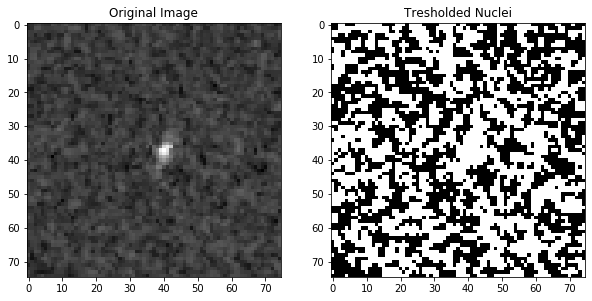

In [21]:
def median_and_otsutresh(img,mediansize = 1,blackbgnd = True):
    # for a function to always work you need to import the libraries used in the function
    from scipy.ndimage import median_filter
    from skimage.filters import threshold_otsu              
    
    medianimg = median_filter(img,mediansize)
    
    tresh = threshold_otsu(medianimg)
    
    # check if the background is black
    if blackbgnd:
        # return thresholded image
        return medianimg > tresh
    
    # background is white
    else:
        # return thresholded image
        return medianimg < tresh

# calling the function
tribolium_binary_function = median_and_otsutresh(test2)    

# plotting------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,10))
plt.gray()  

# displaying the two images
ax1.imshow(test2)
ax2.imshow(tribolium_binary_function)

# setting titles
ax1.set_title("Original Image")
ax2.set_title("Tresholded Nuclei")

# showing the plots
plt.show()  

Text(0.5, 1.0, 'Thresholded Image')

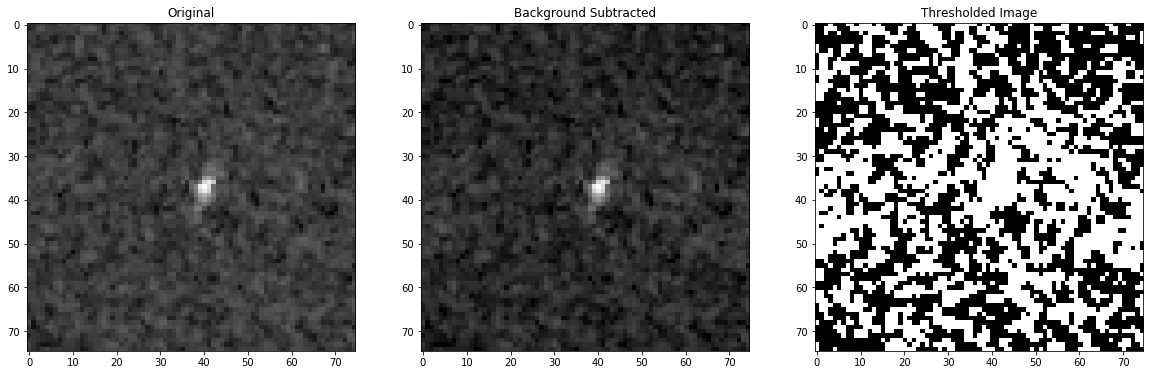

In [22]:
# defining a function for background subtraction
def subtract_background(image, radius=50, light_bg=False):
        #scikit image tophat function and structuring element need to be imported
        from skimage.morphology import white_tophat, black_tophat, disk 
        
        # this structuring element determines the size of background subtraction
        str_el = disk(radius)
        
        if light_bg:
            # the tophat function needs the image as well as the structuring element
            return black_tophat(image, str_el)
        
        else:
            return white_tophat(image, str_el)

# calling the function        
b_sub_triboium = subtract_background(test2,15)        

# thresholding with previous function
thresh_b_sub_trib = median_and_otsutresh(b_sub_triboium)

# plotting-------------------------------------------------------------
# This time we want three plots so we need to change the axes and values accordingly!
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(20,20))

ax1.imshow(test2)
ax1.set_title('Original')

ax2.imshow(b_sub_triboium) 
ax2.set_title('Background Subtracted')

ax3.imshow(thresh_b_sub_trib)
ax3.set_title('Thresholded Image')


In [12]:


#Generate the training data
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in X_train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in X_train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# CNN ALGRORITHME

In [23]:
from tensorflow.keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D,Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# We will use 2 instances of 1 network for this task
# We have 2 inputs, 1 for each picture
left_input = Input((75,75,3))
right_input = Input((75,75,3))

# We will use 2 instances of 1 network for this task
convnet = Sequential([
    Conv2D(5,3, input_shape=(75,75,3)),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(5,3),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(7,2),
    Activation('relu'),
    Flatten(),
    Dense(18),
    Activation('sigmoid')
])
# Connect each 'leg' of the network to each input
# Remember, they have the same weights
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Getting the L1 Distance between the 2 encodings
L1_layer = Lambda(lambda tensor:K.abs(tensor[0] - tensor[1]))

# Add the distance function to the network
L1_distance = L1_layer([encoded_l, encoded_r])

prediction = Dense(1,activation='sigmoid')(L1_distance)
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

optimizer = Adam(0.001, decay=2.5e-4)
#//TODO: get layerwise learning rates and momentum annealing scheme described in paperworking
siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [24]:
# First let's separate the dataset from 1 matrix to a list of matricies
image_list = np.split(X_train[:1000],1000)
label_list = np.split(Y_train[:1000],1000)

left_input = []
right_input = []
targets = []

#Number of pairs per image
pairs = 5
#Let's create the new dataset to train on
for i in range(len(label_list)):
    for _ in range(pairs):
        compare_to = i
        while compare_to == i: #Make sure it's not comparing to itself
            compare_to = random.randint(0,999)
        left_input.append(image_list[i])
        right_input.append(image_list[compare_to])
        if label_list[i] == label_list[compare_to]:# They are the same
            targets.append(1.)
        else:# Not the same
            targets.append(0.)
            
left_input = np.squeeze(np.array(left_input))
right_input = np.squeeze(np.array(right_input))
targets = np.squeeze(np.array(targets))

iceimage = X_train[101]
test_left = []
test_right = []
test_targets = []

for i in range(Y_train.shape[0]-1000):
    test_left.append(iceimage)
    test_right.append(X_train[i+1000])
    test_targets.append(Y_train[i+1000])

test_left = np.squeeze(np.array(test_left))
test_right = np.squeeze(np.array(test_right))
test_targets = np.squeeze(np.array(test_targets))

In [25]:
siamese_net.summary()
cnn = siamese_net.fit([left_input,right_input], targets,
          batch_size=16,
          epochs=5,
          verbose=1,
          validation_data=([test_left,test_right],test_targets))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 18)           6912        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 18)           0           sequential[0][0]             

# TEST UNITAIRE

def test_siamese():
    """
    Test that all components the siamese network work correctly by executing a
    training run against generated data.
    """
    x_train = left_input
    y_train = targets
    input_shape = (75,75,3)

    # Prepare siamese network for training
    optimizer = Adam(0.001)
    siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])

    # Evaluate network before training to establish a baseline
    score_before = siamese_net.evaluate(x_train, y_train, batch_size=16)
    print(f'score before trainging has an accuracy of {score_before[1]} and a loss of {score_before[0]}')
    # Train network
    siamese_net.fit([left_input,right_input], targets,
          batch_size=6,
          epochs=2,
          verbose=1,
          validation_data=([test_left, test_right],test_targets))

    # Evaluate network
    score_after = siamese_net.evaluate(x_train, y_train, batch_size=16)
    print(f'score before trainging has an accuracy of {score_after[1]} and a loss of {score_after[0]}')
    # Ensure that the training loss score improved as a result of the training
    assert(score_before > score_after)
    print(f'All tests passed.The score went from a loss of {score_before[0]} to {score_after[0]} and from an accuracy {score_before[1]} to {score_after[1]}. Training score improved!')

In [27]:
#test_siamese()

# ÉVALUATION

In [28]:


#create a dataframe of the model training history
results = pd.DataFrame(cnn.history)
results.head()



,loss,accuracy,val_loss,val_accuracy
0,0.683187,0.5590,0.689712,0.538066
1,0.649339,0.6450,0.652125,0.666560
2,0.607984,0.6912,0.599212,0.720527
3,0.564025,0.7340,0.532310,0.797623
4,0.510200,0.7730,0.797255,0.427562


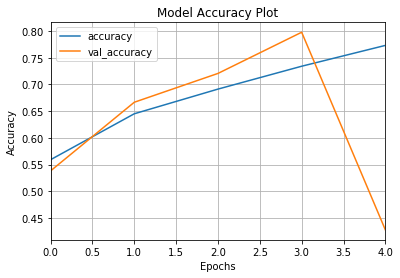

In [29]:
#plot the accuracy over the training and test set
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

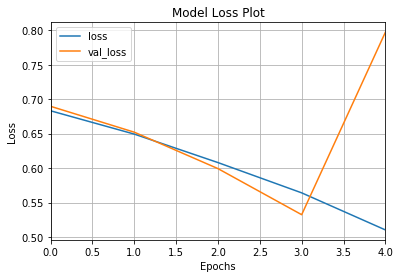

In [30]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

https://biapol.github.io/blog/ryan_savill/02_intro_to_skimage/

https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-dataset-for-starters

In [31]:
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense

# Hotfix function
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

# Run the function
make_keras_picklable()


In [32]:
model = siamese_net

In [33]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("/home/apprenant/PycharmProjects/ClimateProject---E3/model/siamese.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/siamese.h5")